# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [25]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

580

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [26]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
names = []
city_id = []
clouds = []
country =[]
date = []
humidity = []
lat = []
lon = []
max_temp = []
wind_speed = []


for city in cities:
    try:
        response = requests.get(query_url + city).json()
        names.append(response['name'])
        city_id.append(response['id'])
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
       
        print(response['name'],response['id'])
    except:
        continue
weather_dict = {
    "City_ID": city_id,
    "City": cities,
    "Cloudiness": clouds,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lon,
    "Max Temp":max_temp,
    "Wind Speed":wind_speed}

Punta Arenas 3874787
Vasil'sursk 476732
Ushuaia 3833367
Rikitea 4030556
Coyhaique 3894426
Bluff 2206939
Bolintin Deal 684269
Tiksi 2015306
Bhilwara 1275960
Iqaluit 5983720
Vestmannaeyjar 3412093
Busselton 2075265
Butaritari 2110227
Puerto Ayora 3652764
Meulaboh 1214488
Avarua 4035715
Pevek 2122090
Tasiilaq 3424607
Calvià 2520493
Lagoa 3372964
Longyearbyen 2729907
Belmonte 3470137
Arraial do Cabo 3471451
Lebu 3883457
Lompoc 5367788
Makkah al Mukarramah 104515
Dingle 1714733
Brae 2654970
Albany 5106841
Muros 3115824
Leshukonskoye 535839
Hermanus 3366880
Ribeira Grande 3372707
Cururupu 3401148
Jamestown 5122534
Yaguajay 3533826
Yangi Marg`ilon 1513491
Cape Town 3369157
Mar del Plata 3430863
Belinsky 578045
Barrow 5880054
Port Elizabeth 964420
Jiazi 1805935
Gremyachinsk 558885
Vila Franca do Campo 3372472
Mataura 6201424
Guane 3557758
San Patricio 3985168
Shelopugino 2016757
Jiayuguan City 1280957
Castro 3466704
Polunochnoye 1494482
Matamoros 3996426
Fortuna 5563839
Qaanaaq 3831208
Hopkins

Makakilo City 5850554
Ereymentau 1524302
Apostolove 713245
Poum 2138555
Tanete 1629965
Henties Bay 3356832
Cartagena 3687238
Kaeo 2189343
Hauterive 3013748
Morondava 1058381
Chumikan 2025256
San Ramon 5392593
Nybro 2687902
Port-Cartier 6111696
Kudahuvadhoo 1337607
Bara 2347758
Jinka 333750
Cape Coast 2302357
Camacha 2270385
Jumla 1283285
Sistranda 3139597
Bariloche 7647007
Kutum 371745
Rapu-Rapu 1691862
Berlevåg 780687
Hailey 5594956
Iaciara 3461641
Cabedelo 3404558
Romitan 1217662
Walvis Bay 3359638
Pontes e Lacerda 3453060
Ostrovnoy 556268
Belle Fourche 5762718
Xai-Xai 1024552
Amga 2027786
Galveston 4692856
Los Llanos de Aridane 2514651
Xinqing 2033667
Vieste 3164387
Broome 5110365
Barabai 1650064
Piracuruca 3391991
Rovaniemi 638936
Governador Dix-Sept Rosado 3398871
Khorixas 3356213
Grand Gaube 934479
Naze 1855540
Victor Harbor 2059470
Sinegor'ye 2121197
España 1713797
São Fidélis 3449195
Santa Cruz de la Sierra 3904906
Muli 1337617
Klang 1732905
Billings Metropolitan Area 5640350
F

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
print(response)

{'coord': {'lon': 45.05, 'lat': -25.17}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 15.78, 'feels_like': 15.42, 'temp_min': 15.78, 'temp_max': 15.78, 'pressure': 1019, 'humidity': 95, 'sea_level': 1019, 'grnd_level': 1001}, 'visibility': 10000, 'wind': {'speed': 2.81, 'deg': 320}, 'clouds': {'all': 18}, 'dt': 1596083065, 'sys': {'country': 'MG', 'sunrise': 1596080295, 'sunset': 1596119640}, 'timezone': 10800, 'id': 1067565, 'name': 'Beloha', 'cod': 200}


In [28]:
weather_dict.values()


dict_values([[3874787, 476732, 3833367, 4030556, 3894426, 2206939, 684269, 2015306, 1275960, 5983720, 3412093, 2075265, 2110227, 3652764, 1214488, 4035715, 2122090, 3424607, 2520493, 3372964, 2729907, 3470137, 3471451, 3883457, 5367788, 104515, 1714733, 2654970, 5106841, 3115824, 535839, 3366880, 3372707, 3401148, 5122534, 3533826, 1513491, 3369157, 3430863, 578045, 5880054, 964420, 1805935, 558885, 3372472, 6201424, 3557758, 3985168, 2016757, 1280957, 3466704, 1494482, 3996426, 5563839, 3831208, 4295251, 1791779, 2194098, 501847, 2130188, 1282256, 5815136, 5924351, 1252795, 4031637, 6170031, 2156643, 6165406, 2346995, 1106677, 1062663, 2063036, 6113406, 922704, 5546220, 8070858, 5848280, 2171099, 3395042, 5866583, 933734, 504576, 4341378, 4032243, 4033543, 5861897, 1529651, 2126682, 3984997, 1215502, 2447513, 2071860, 964432, 2542997, 3402648, 3533462, 5808079, 4020109, 1633419, 1510689, 2163355, 1255396, 4004293, 1524606, 1842225, 3423146, 4174301, 2109528, 933471, 3466165, 3171173, 

In [29]:
city =pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in weather_dict.items() ]))
city

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,3874787.0,punta arenas,84.0,CL,1.596082e+09,85.0,-53.15,-70.92,0.00,2.10
1,476732.0,vasilsursk,62.0,RU,1.596083e+09,81.0,56.13,46.01,18.81,4.05
2,3833367.0,ushuaia,20.0,AR,1.596082e+09,74.0,-54.80,-68.30,3.00,6.20
3,4030556.0,rikitea,100.0,PF,1.596083e+09,87.0,-23.12,-134.97,22.64,6.20
4,3894426.0,coihaique,100.0,CL,1.596083e+09,86.0,-45.58,-72.07,-1.00,1.50
...,...,...,...,...,...,...,...,...,...,...
575,NaN,montana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
576,NaN,thio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
577,NaN,faya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
578,NaN,halifax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
city_clean = city.dropna()
city_clean

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,3874787.0,punta arenas,84.0,CL,1.596082e+09,85.0,-53.15,-70.92,0.00,2.10
1,476732.0,vasilsursk,62.0,RU,1.596083e+09,81.0,56.13,46.01,18.81,4.05
2,3833367.0,ushuaia,20.0,AR,1.596082e+09,74.0,-54.80,-68.30,3.00,6.20
3,4030556.0,rikitea,100.0,PF,1.596083e+09,87.0,-23.12,-134.97,22.64,6.20
4,3894426.0,coihaique,100.0,CL,1.596083e+09,86.0,-45.58,-72.07,-1.00,1.50
...,...,...,...,...,...,...,...,...,...,...
531,729114.0,kutum,0.0,BG,1.596083e+09,59.0,43.41,23.23,22.55,1.20
532,2138103.0,rapu-rapu,77.0,NC,1.596083e+09,54.0,-21.62,166.22,29.00,5.70
533,110690.0,berlevag,100.0,SA,1.596083e+09,87.0,18.39,42.45,18.00,2.19
534,6324729.0,hailey,20.0,CA,1.596083e+09,82.0,44.65,-63.57,20.00,1.49


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [31]:
#  Get the indices of cities that have humidity over 100%.
city1 = city_clean[city_clean['Humidity'] > 100] 
print(city1)

Empty DataFrame
Columns: [City_ID, City, Cloudiness, Country, Date, Humidity, Lat, Lng, Max Temp, Wind Speed]
Index: []


In [32]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [33]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
city_clean.to_csv('city_data.csv', index=False, encoding='utf-8')


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot
The temperature increases as latitudeincreases from -60 till it reaches maximum at around 40; then it starts declining again

Text(0.5, 1.0, 'Latitude vs. Temperature')

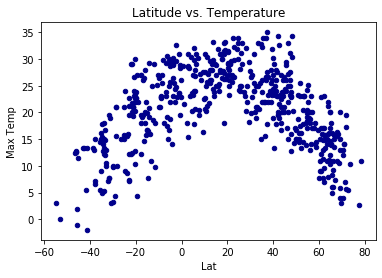

In [34]:
ax1 = city_clean.plot.scatter(x='Lat',
                      y='Max Temp',
                      c='DarkBlue')
plt.title('Latitude vs. Temperature')


## Latitude vs. Humidity Plot
The plot shows no clear correlation between latitude and humidity

Text(0.5, 1.0, 'Latitude vs. Humidity')

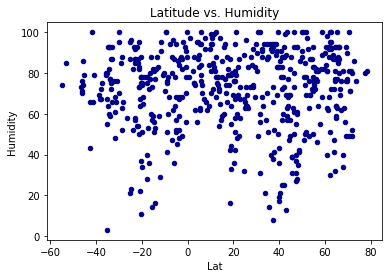

In [35]:
ax1 = city_clean.plot.scatter(x='Lat',
                      y='Humidity',
                      c='DarkBlue')
plt.title('Latitude vs. Humidity')

## Latitude vs. Cloudiness Plot
The plot shows no clear correlation between latitude and cloudiness

Text(0.5, 1.0, 'Latitude vs. Cloudiness')

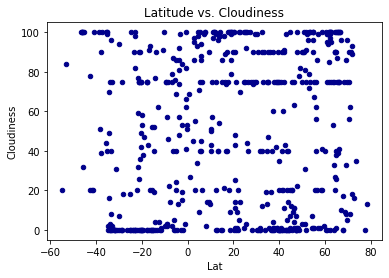

In [36]:
ax1 = city_clean.plot.scatter(x='Lat',
                      y='Cloudiness',
                      c='DarkBlue')
plt.title('Latitude vs. Cloudiness')

## Latitude vs. Wind Speed Plot
The plot shows no correlation between Latitude and Wind speed 


Text(0.5, 1.0, 'Latitude vs. Wind Speed')

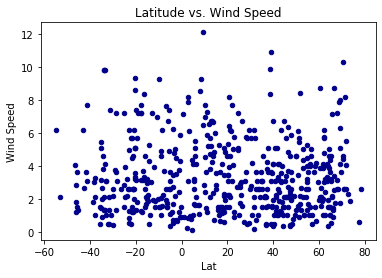

In [37]:
ax1 = city_clean.plot.scatter(x='Lat',
                      y='Wind Speed',
                      c='DarkBlue')
plt.title('Latitude vs. Wind Speed')

## Linear Regression

In [42]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear(x_values, y_values, title, xlabel, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, alpha=0.7)
    plt.plot(x_values,regress_values,"r-")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    print(f"The r-squared is: {rvalue**2}")
    print(line_eq)
    return

In [44]:
# Create Northern and Southern Hemisphere DataFrames
north_hem = city_clean[city_clean['Lat'] > 0] 
north_hem

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,476732.0,vasilsursk,62.0,RU,1.596083e+09,81.0,56.13,46.01,18.81,4.05
6,684269.0,bolintin deal,0.0,RO,1.596083e+09,69.0,44.46,25.82,26.11,1.00
7,2015306.0,tiksi,89.0,RU,1.596083e+09,80.0,71.69,128.87,5.73,4.06
8,1275960.0,bhilwara,92.0,IN,1.596083e+09,73.0,25.35,74.63,28.19,1.73
9,5983720.0,iqaluit,75.0,CA,1.596083e+09,72.0,63.75,-68.51,15.00,3.10
...,...,...,...,...,...,...,...,...,...,...
529,60019.0,sistranda,2.0,SO,1.596083e+09,66.0,7.98,49.82,27.20,8.52
530,3419842.0,san carlos de bariloche,96.0,GL,1.596083e+09,76.0,66.94,-53.67,7.36,1.77
531,729114.0,kutum,0.0,BG,1.596083e+09,59.0,43.41,23.23,22.55,1.20
533,110690.0,berlevag,100.0,SA,1.596083e+09,87.0,18.39,42.45,18.00,2.19


In [45]:
south_hem = city_clean[city_clean['Lat'] < 0] 
south_hem

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,3874787.0,punta arenas,84.0,CL,1.596082e+09,85.0,-53.15,-70.92,0.00,2.10
2,3833367.0,ushuaia,20.0,AR,1.596082e+09,74.0,-54.80,-68.30,3.00,6.20
3,4030556.0,rikitea,100.0,PF,1.596083e+09,87.0,-23.12,-134.97,22.64,6.20
4,3894426.0,coihaique,100.0,CL,1.596083e+09,86.0,-45.58,-72.07,-1.00,1.50
5,2206939.0,bluff,100.0,NZ,1.596083e+09,73.0,-46.60,168.33,12.44,4.07
...,...,...,...,...,...,...,...,...,...,...
521,3449195.0,nybro,32.0,BR,1.596083e+09,87.0,-21.65,-41.75,20.09,1.19
522,3904906.0,port-cartier,75.0,BO,1.596083e+09,28.0,-17.80,-63.17,18.00,7.70
526,1065158.0,cape coast,82.0,MG,1.596083e+09,92.0,-22.82,47.83,19.55,2.59
532,2138103.0,rapu-rapu,77.0,NC,1.596083e+09,54.0,-21.62,166.22,29.00,5.70


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

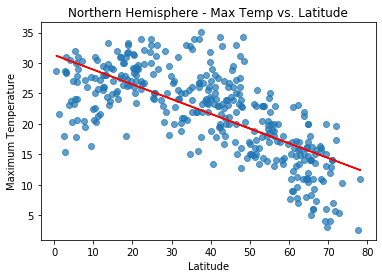

The r-squared is: 0.48757102851934214
y = -0.24x + 31.32


In [47]:
linear(north_hem['Lat'], north_hem['Max Temp'], "Northern Hemisphere - Max Temp vs. Latitude", "Latitude", "Maximum Temperature" )

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

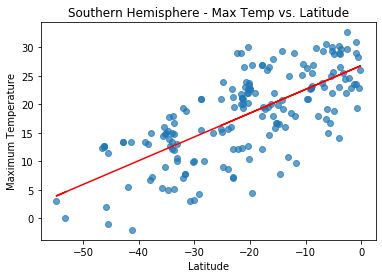

The r-squared is: 0.502662646578239
y = 0.42x + 26.82


In [48]:
linear(south_hem['Lat'], south_hem['Max Temp'], "Southern Hemisphere - Max Temp vs. Latitude", "Latitude", "Maximum Temperature")

##### The temperature increases as latitude increases till it peaks at 0; then, it starts declining again

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

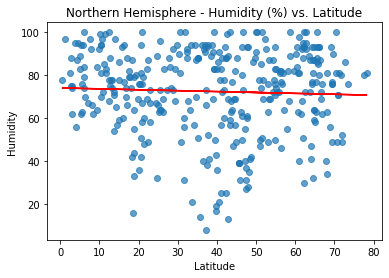

The r-squared is: 0.0018688447325599406
y = -0.04x + 74.09


In [49]:
linear(north_hem['Lat'], north_hem['Humidity'], "Northern Hemisphere - Humidity (%) vs. Latitude", "Latitude", "Humidity")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

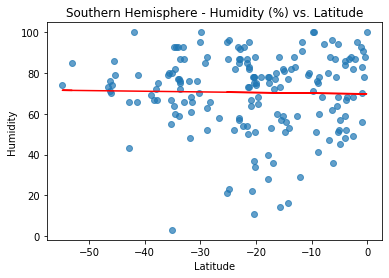

The r-squared is: 0.00045856582517848535
y = -0.03x + 69.77


In [50]:
linear(south_hem['Lat'], south_hem['Humidity'], "Southern Hemisphere - Humidity (%) vs. Latitude", "Latitude", "Humidity")

#### The plots show no correlation between Latitude and Humidity 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

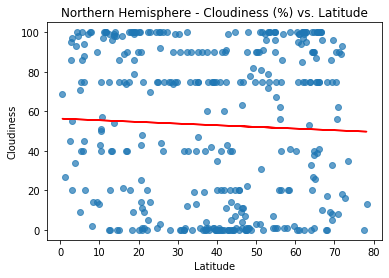

The r-squared is: 0.0019298513034778533
y = -0.08x + 56.32


In [51]:
linear(north_hem['Lat'], north_hem['Cloudiness'], "Northern Hemisphere - Cloudiness (%) vs. Latitude", "Latitude", "Cloudiness")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

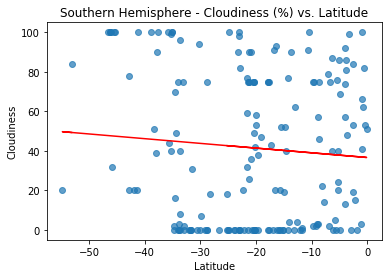

The r-squared is: 0.006689301487019511
y = -0.24x + 36.62


In [52]:
linear(south_hem['Lat'], south_hem['Cloudiness'], "Southern Hemisphere - Cloudiness (%) vs. Latitude", "Latitude", "Cloudiness")

#### The plots show no correlation between latitude and cloudiness 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

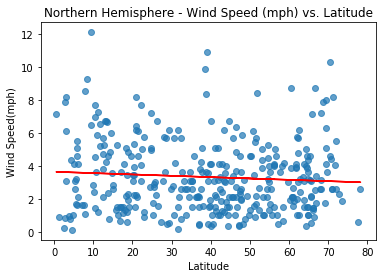

The r-squared is: 0.005946931078791073
y = -0.01x + 3.64


In [53]:
linear(north_hem['Lat'], north_hem['Wind Speed'], "Northern Hemisphere - Wind Speed (mph) vs. Latitude", "Latitude", "Wind Speed(mph)")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

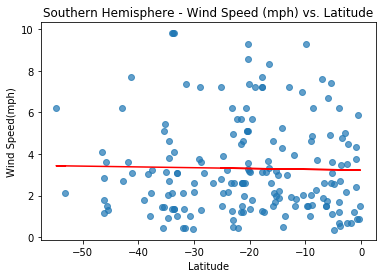

The r-squared is: 0.00046788410601747963
y = -0.0x + 3.22


In [54]:
linear(south_hem['Lat'], south_hem['Wind Speed'], "Southern Hemisphere - Wind Speed (mph) vs. Latitude", "Latitude", "Wind Speed(mph)")

#### The plots show no correlation between latitude and wind speed